In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt

In [54]:
file_path = "./customers.csv"
df_shopping = pd.read_csv(file_path)
df_shopping.head(10)

,CutomerID,Card_member,Age,Annual_income,Spending_score
0,1,1,19.0,15.0,39.0
1,2,1,21.0,15.0,81.0
2,3,0,20.0,16.0,6.0
3,4,0,23.0,16.0,77.0
4,5,0,31.0,17.0,40.0
5,6,0,22.0,17.0,76.0
6,7,0,35.0,18.0,6.0
7,8,0,23.0,18.0,94.0
8,9,1,64.0,19.0,3.0
9,10,0,30.0,19.0,72.0


In [3]:
df_shopping.hvplot.scatter(x='Annual_income', y='Spending_score')

:Scatter   [Annual_income]   (Spending_score)

In [9]:
def test_cluster_amount(df, clusters):
    model = KMeans(n_clusters=clusters, random_state=5)   
   # Fitting model
    model.fit(df)
    df["class"] = model.labels_

In [13]:
test_cluster_amount(df_shopping, 3)
df_shopping.hvplot.scatter(x="Annual_income", y="Spending_score", by="class")

:NdOverlay   [class]
   :Scatter   [Annual_income]   (Spending_score)

In [14]:
fig = px.scatter_3d(df_shopping,x="Annual_income", y="Spending_score", 
                    z='Age', color='class', size='Annual_income', symbol='class', height=800)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [15]:
file_path = "./new_iris.csv"
df_iris = pd.read_csv(file_path)
df_iris.head(10)

,sepal_length,petal_length,sepal_width,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
inertia = []
k = list(range(1, 11))

In [24]:
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris)
    inertia.append(km.inertia_)


In [25]:
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [51]:
inertia = []
k = list(range(1,11))
for i in k:
    km = KMeans(n_clusters=i,random_state=5)
    km.fit(df_shopping)
    inertia.append(km.inertia_)
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

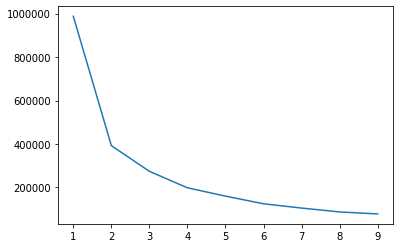

In [33]:
plt.plot(k, inertia)

In [31]:
km = KMeans(n_clusters=2)
km.fit(df_shopping)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
def get_clusters(k, data):
        km = KMeans(n_clusters=k, random_state=1)
        km.fit(data)
        data["class"] = km.labels_
        inertia.append(km.inertia_)
        return data


In [73]:
x =  get_clusters(5, df_shopping)
x.head()

,CutomerID,Card_member,Age,Annual_income,Spending_score,class
0,1,1,19.0,15.0,39.0,4
1,2,1,21.0,15.0,81.0,4
2,3,0,20.0,16.0,6.0,0
3,4,0,23.0,16.0,77.0,4
4,5,0,31.0,17.0,40.0,0


In [75]:
x.hvplot.scatter(x='Annual_income', y='Spending_score', by='class')

:NdOverlay   [class]
   :Scatter   [Annual_income]   (Spending_score)